### Multiple Linear Regression Exercise

| Sütun Adı | Açıklama                                             |
|-----------|------------------------------------------------------|
| age       | Ana Hak Sahibinin yaşı                               |
| sex       | Cinsiyet (Kadın, Erkek)                               |
| bmi       | Vücut kitle indeksi (BMI); boy ve kilo arasındaki oran|
| children  | Sigorta kapsamındaki çocuk sayısı / Bağımlı sayısı   |
| smoker    | Sigara içiyor mu? (Evet, Hayır)                        |
| region    | Hak Sahibinin ABD'deki ikamet bölgesi (Kuzeydoğu, Güneydoğu, Güneybatı, Kuzeybatı) |
| charges   | Sağlık sigortası tarafından faturalanan bireysel tıbbi maliyetler |


In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
from sklearn import linear_model
from sklearn.metrics import r2_score
import seaborn as sns

In [35]:
url = "../Odevler/data/insurance.csv"
data = pd.read_csv(url)

In [37]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [36]:
data.shape

(1338, 7)

In [39]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [51]:
data["charges"].sort_values()

940      1121.87390
808      1131.50660
1244     1135.94070
663      1136.39940
22       1137.01100
           ...     
819     55135.40209
577     58571.07448
1230    60021.39897
1300    62592.87309
543     63770.42801
Name: charges, Length: 1338, dtype: float64

In [38]:
data["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [40]:
# categoric variables converting to numeric values
data['sex'] = data['sex'].map({'male': 0, 'female': 1})
data['smoker'] = data['smoker'].map({'no': 0, 'yes': 1})

In [41]:
msk = np.random.rand(len(data)) < 0.8
train = data[msk]
test = data[~msk]

In [42]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['age','sex','bmi','smoker']])
y = np.asanyarray(train[['charges']])

regr.fit(x, y)

LinearRegression()

In [43]:
y_hat = regr.predict(np.asanyarray(test[['age','sex','bmi','smoker']]))
x = np.asanyarray(test[['age','sex','bmi','smoker']])
y = np.asanyarray(test[['charges']])

print("Mean Squared Error (MSE) : %.2f"
      % np.mean((y_hat - y) ** 2))

print('Variance score: %.2f' % regr.score(x, y)) # explained variance, best score is 1.0

Mean Squared Error (MSE) : 37749155.14
Variance score: 0.75


Text(0, 0.5, 'charges')

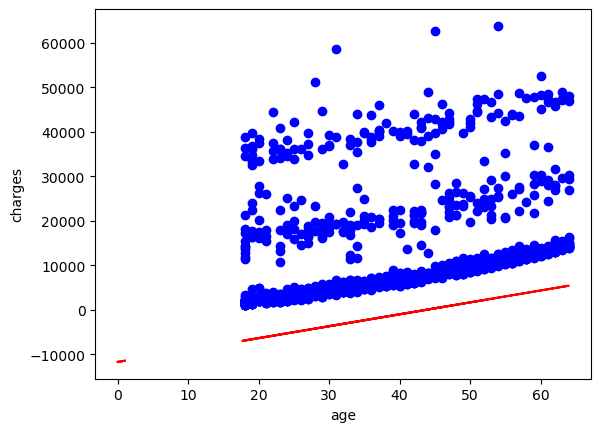

In [53]:
plt.scatter(train.age, train.charges, color="blue")
plt.plot(x,regr.coef_[0][0]*x + regr.intercept_[0],"-r")
plt.xlabel("age")
plt.ylabel("charges")